In [118]:
%load_ext autoreload
%autoreload 2

# Model design
import agentpy as ap
import random

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython

from EnergyShedModel import EnergyShedModel
from plots import status_stackplot, cost_lineplot, transfer_lineplot, animation_plot

random.seed(1)

NUM_STEPS = 5

POP_SIZE = 16
GRID_SIZE = 4

SUNNY_PROB = 0.5
PERCENT_PRODUCERS = 0.5


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Grid agent

In [119]:
parameters = {"population": POP_SIZE, "steps": NUM_STEPS, "grid_size": (GRID_SIZE, GRID_SIZE), "agent_type": "grid", "sunny_prob" : SUNNY_PROB, "percent_producers": PERCENT_PRODUCERS}

model = EnergyShedModel(parameters)
results = model.run()

Completed: 5 steps
Run time: 0:00:00.002979
Simulation finished


In [120]:
results.reporters
results.variables.EnergyShedModel

,none,buy,sell,energy_production,local_transfer,grid_transfer,cost,weather
t,,,,,,,,
0,1.0,0.0000,0.0000,96.558132,0,0.000000,0.000000,Cloudy
1,0.0,0.5000,0.5000,120.612346,0,60.595548,-605.955480,Sunny
2,0.0,0.4375,0.5625,128.864128,0,120.867822,-1208.678217,Sunny
3,0.0,1.0000,0.0000,60.917670,0,219.950152,-2199.501520,Cloudy
4,0.0,0.5000,0.5000,118.561541,0,281.182719,-2811.827186,Sunny
5,0.0,1.0000,0.0000,62.554542,0,378.628176,-3786.281764,Cloudy


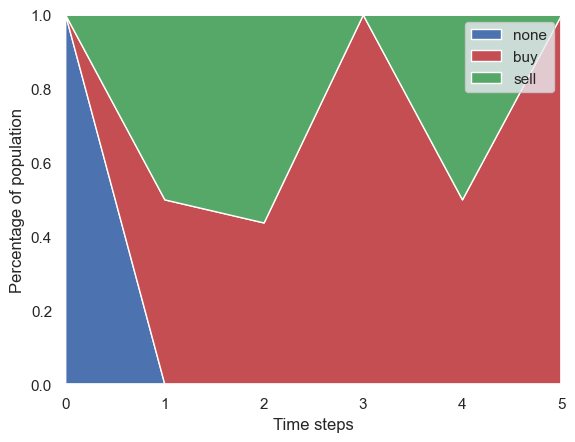

In [121]:
fig, ax = plt.subplots()
status_stackplot(results.variables.EnergyShedModel, ax)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0.98, 'Grid Model')

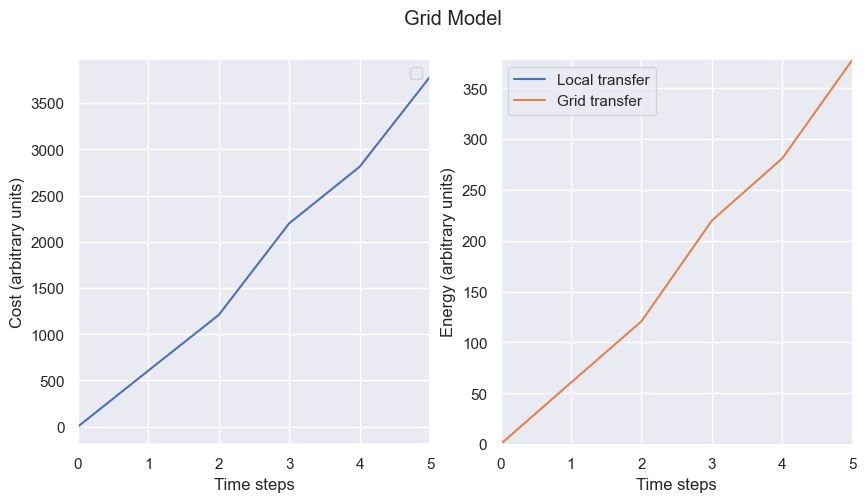

In [122]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
cost_lineplot(results.variables.EnergyShedModel, ax=ax1)
transfer_lineplot(results.variables.EnergyShedModel, ax=ax2)
fig.suptitle("Grid Model")

In [123]:
fig, ax = plt.subplots()
model = EnergyShedModel(parameters)
animation = ap.animate(model, fig, ax, animation_plot)
IPython.display.HTML(animation.to_jshtml())

# Reflex agents

In [124]:
parameters = {"population": POP_SIZE, "steps": NUM_STEPS, "grid_size": (GRID_SIZE, GRID_SIZE), "agent_type": "reflex", "sunny_prob" : SUNNY_PROB, "percent_producers": PERCENT_PRODUCERS}

model = EnergyShedModel(parameters)
results = model.run()

AttributeError: sunny_prob

In [ ]:
results.reporters

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
cost_lineplot(results.variables.EnergyShedModel, ax=ax1)
transfer_lineplot(results.variables.EnergyShedModel, ax=ax2)
fig.suptitle("Reflex Model")

In [117]:
fig, ax = plt.subplots()
model = EnergyShedModel(parameters)
animation = ap.animate(model, fig, ax, animation_plot)
IPython.display.HTML(animation.to_jshtml())

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


NameError: name 'colors' is not defined

# MDP Agents

In [ ]:
parameters = {"population": POP_SIZE, "steps": NUM_STEPS, "grid_size": (GRID_SIZE, GRID_SIZE), "agent_type": "mdp"}

model = EnergyShedModel(parameters)
results = model.run()

# Experiments

In [ ]:
parameters = {
    "population": ap.IntRange(100, 1000),
    "number_of_neighbors": 4,
    "network_randomness": ap.Range(0.0, 1.0),
}

sample = ap.Sample(parameters, n=128, method="saltelli", calc_second_order=False)

In [ ]:
exp = ap.Experiment(EnergyShedModel, sample, iterations=10)
results = exp.run()

In [ ]:
results.save()

In [ ]:
results

In [ ]:
results.reporters.hist();

In [ ]:
# Sensitivity Analysis

In [ ]:
results.calc_sobol()

In [ ]:
def plot_sobol(results):
    """Bar plot of Sobol sensitivity indices."""

    sns.set()
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    si_list = results.sensitivity.sobol.groupby(by="reporter")
    si_conf_list = results.sensitivity.sobol_conf.groupby(by="reporter")

    for (key, si), (_, err), ax in zip(si_list, si_conf_list, axs):
        si = si.droplevel("reporter")
        err = err.droplevel("reporter")
        si.plot.barh(xerr=err, title=key, ax=ax, capsize=3)
        ax.set_xlim(0)

    axs[0].get_legend().remove()
    axs[1].set(ylabel=None, yticklabels=[])
    axs[1].tick_params(left=False)
    plt.tight_layout()


plot_sobol(results)

In [ ]:
def plot_sensitivity(results):
    """Show average simulation results for different parameter values."""

    sns.set()
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))
    axs = [i for j in axs for i in j]  # Flatten list

    data = results.arrange_reporters().astype("float")
    params = results.parameters.sample.keys()

    for x, ax in zip(params, axs):
        for y in results.reporters.columns:
            sns.regplot(x=x, y=y, data=data, ax=ax, ci=99, x_bins=15, fit_reg=False, label=y)
        ax.set_ylim(0, 1)
        ax.set_ylabel("")
        ax.legend()

    plt.tight_layout()


plot_sensitivity(results)